What if we try to classify the contents of images where the location of a feature isn’t always in the same place?

# ImageDataGenerator
ImageDataGenerator class has ability to produce real-time image augmentation. This simply means it can generate augmented images dynamically during the training of the model making the overall mode more robust and accurate.

The ImageDataGenerator class offers various methods for image data augmentation, such as rotation, shifting, flipping, zooming, shearing, and more. These transformations can be applied to the input images, which helps increase the diversity and variability of the training data, making the model more robust to different variations and improving its ability to generalize to new, unseen data.

Many image-based datasets do not have labeled data. Instead of labels, the images are sorted into subdirectories of each type. With Keras in TensorFlow, a tool called the ImageDataGenerator can use this structure to automatically assign labels to images.



ImageDataGenerator expects the input data to be in the shape of (samples, height, width, channels) or (samples, channels, height, width).

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

print(tf.__version__)

2.12.0


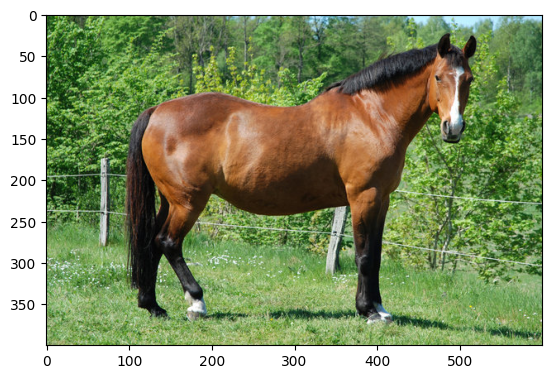

In [2]:
img_path = "/content/drive/Othercomputers/My Laptop/AI/deep-learning/2023-06-21-ImageDataGenerator/horse.jpg"
img = tf.keras.preprocessing.image.load_img(img_path)
plt.imshow(img)
plt.show()

Image Shape: data.shape=  (400, 600, 3)
Samples: np.array([data]).shape =  (1, 400, 600, 3)


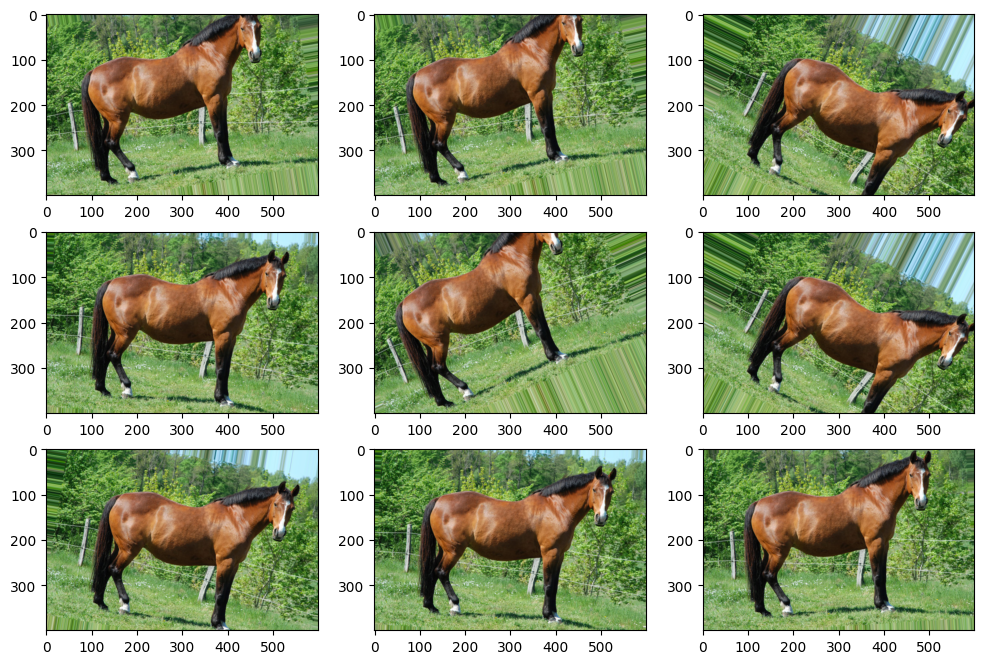

In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# loading image
img_path = "/content/drive/Othercomputers/My Laptop/AI/deep-learning/2023-06-21-ImageDataGenerator/horse.jpg"
img = tf.keras.preprocessing.image.load_img(img_path)

# for processing, converting image to ndarray
data = tf.keras.preprocessing.image.img_to_array(img)
print("Image Shape: data.shape= ", data.shape)

# data documentation Rotation
datagen = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=30)

# ImageDataGenerator expects the input data to be in the shape of (samples, height, width, channels)
# So, expanding dimension to one sample by np.array([data])
print("Samples: np.array([data]).shape = ", np.array([data]).shape)
augmented_images = datagen.flow(np.array([data]), batch_size=1)

# plot the augmented images
fig, axes = plt.subplots(3, 3, figsize=(12, 8))
axes = axes.flatten()

for i in range(9):
    augmented_image = augmented_images.next()[0]
    axes[i].imshow(augmented_image.astype(np.uint8))

plt.show()

Image Shape: data.shape=  (400, 600, 3)
Samples: np.array([data]).shape =  (1, 400, 600, 3)


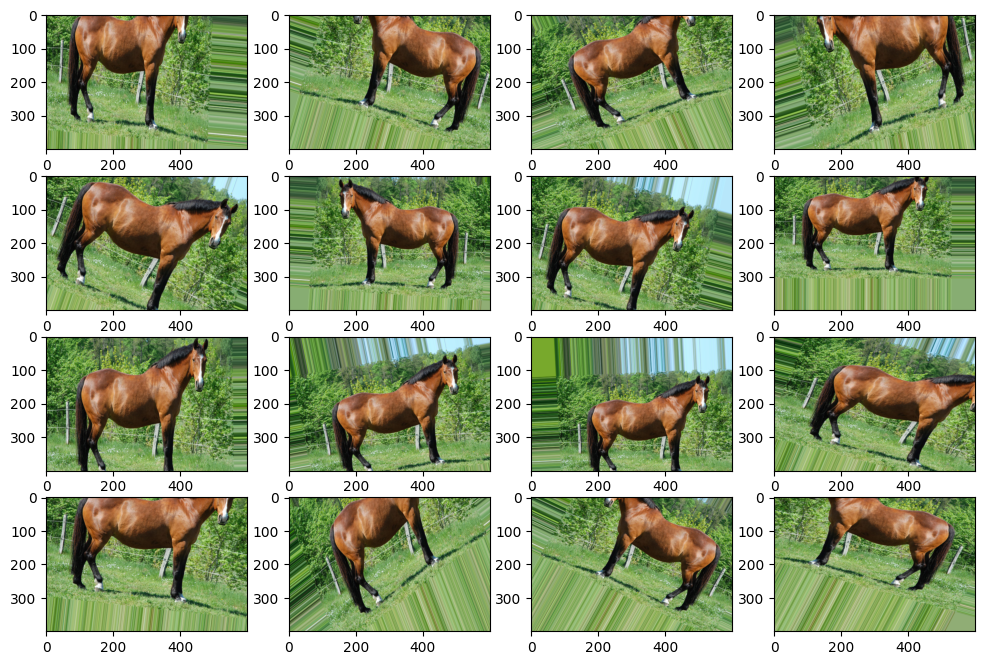

In [4]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# loading image
img_path = "/content/drive/Othercomputers/My Laptop/AI/deep-learning/2023-06-21-ImageDataGenerator/horse.jpg"
img = tf.keras.preprocessing.image.load_img(img_path)

# for processing, converting image to ndarray
data = tf.keras.preprocessing.image.img_to_array(img)
print("Image Shape: data.shape= ", data.shape)

# data documentation - Multiple features
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# ImageDataGenerator expects the input data to be in the shape of (samples, height, width, channels)
# So, expanding dimension to one sample
print("Samples: np.array([data]).shape = ", np.array([data]).shape)
augmented_images = datagen.flow(np.array([data]), batch_size=1)

# plot the augmented images
fig, axes = plt.subplots(4, 4, figsize=(12, 8))
axes = axes.flatten()

for i in range(16):
    augmented_image = augmented_images.next()[0]
    axes[i].imshow(augmented_image.astype(np.uint8))

plt.show()